### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [48]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
rate = pd.read_csv('Data.csv')
rate.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
movies = pd.read_csv('item.csv')
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
users = pd.read_csv('user.csv')
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

#### 3a. Breifly Explore Data Set- rate

In [8]:
print("\n\n INFO: info() method output for rate Dataset - rate.info() \n") 
print(rate.info())
print("\n\n INFO: shape() method output for rate Dataset - rate.shape \n") 
print(rate.shape)
print("\n\n INFO: describe() method output for rate Dataset - rate.describe() \n") 
print(rate.describe())
print("\n\n INFO: isnull().sum() method output for rate Dataset - rate.isnull().sum() \n") 
rate_TotMissingVals = rate.isnull().sum()
print(rate_TotMissingVals)



 INFO: info() method output for rate Dataset - rate.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


 INFO: shape() method output for rate Dataset - rate.shape 

(100000, 4)


 INFO: describe() method output for rate Dataset - rate.describe() 

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000  

In [9]:
# Breifly Explore Data Frame- movies
print("\n\n INFO: info() method output for movies Dataset - movies.info() \n") 
print(movies.info())
print("\n\n INFO: shape() method output for movies Dataset - movies.shape \n") 
print(movies.shape)
print("\n\n INFO: describe() method output for movies Dataset - movies.describe() \n") 
print(movies.describe())
print("\n\n INFO: isnull().sum() method output for movies Dataset - movies.isnull().sum() \n") 
movies_TotMissingVals = movies.isnull().sum()
print(movies_TotMissingVals)



 INFO: info() method output for movies Dataset - movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-

In [10]:
# Briefly Explore Data Frame - users
print("\n\n INFO: info() method output for users Dataset - users.info() \n") 
print(users.info())
print("\n\n INFO: shape() method output for users Dataset - users.shape \n") 
print(users.shape)
print("\n\n INFO: describe() method output for users Dataset - users.describe() \n") 
print(users.describe())
print("\n\n INFO: isnull().sum() method output for users Dataset - users.isnull().sum() \n") 
users_TotMissingVals = users.isnull().sum()
print(users_TotMissingVals)



 INFO: info() method output for users Dataset - users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


 INFO: shape() method output for users Dataset - users.shape 

(943, 5)


 INFO: describe() method output for users Dataset - users.describe() 

          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000


 INFO: isnull().sum() method output for users Dataset - users.isnull().sum()

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [11]:
#comedy_movies = movies['genres'].str.contains('Comedy')
print("List_of_columns in movies: ",movies.columns)
moviesGenre = movies.iloc[:,3:]
print("\nList_of_columns in moviesGenre DataFrame: ",moviesGenre.columns)
print("\nNumber of Movies per Genre")
print("\nGenre\t\tCount\n",moviesGenre.sum())

List_of_columns in movies:  Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

List_of_columns in moviesGenre DataFrame:  Index(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

Number of Movies per Genre

Genre		Count
 unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       2

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [12]:
# Create a new dataframe called mod_movies with 'Unknown' Genre removed
movies_mod=movies[movies['unknown']!=1]
print(movies_mod.sum())

movie id                                                  1413763
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         0
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [260]:
moviesGenreCount = movies.iloc[:,1:2]
moviesGenreCount
#np.array(moviesGenre.sum(axis=1))
moviesGenreCount['GenreCount']=np.array(moviesGenre.sum(axis=1))
#moviesGenre.sum(axis=1)
print("\nMovies DataFrame with GenreCount\n", moviesGenreCount)
print("\nMovies with GenreCount>1\n",moviesGenreCount[moviesGenreCount['GenreCount']>1])
print("\nTotal Number of Movies With GenreCount>1: ",len(moviesGenreCount[moviesGenreCount['GenreCount']>1]))
print("\nTop5 Movies With GenreCount>1: \n", moviesGenreCount[moviesGenreCount['GenreCount']>1].sort_values(by='GenreCount',ascending=False).head())


Movies DataFrame with GenreCount
                               movie title  GenreCount
0                              Toy Story            3
1                              GoldenEye            3
2                             Four Rooms            1
3                             Get Shorty            3
4                                Copycat            3
...                                   ...         ...
1676                          Mat' i syn            1
1677                           B. Monkey            2
1678                       Sliding Doors            2
1679                        You So Crazy            1
1680  Scream of Stone (Schrei aus Stein)            1

[1681 rows x 2 columns]

Movies with GenreCount>1
              movie title  GenreCount
0             Toy Story            3
1             GoldenEye            3
3            Get Shorty            3
4               Copycat            3
6        Twelve Monkeys            2
...                  ...         ...
1667  

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown



Univariate Plot Frequency Distribution Plot 'Age':


Insights: Age group between 20-30 are the major cutomers in the market



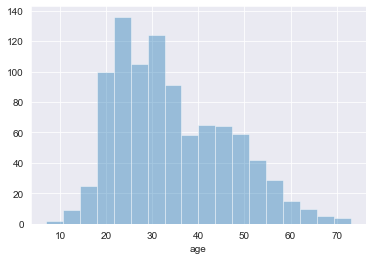

In [263]:
print("\nUnivariate Plot Frequency Distribution Plot 'Age':\n");
sns.distplot(users['age'],kde=False);
print("\nInsights: Age group between 20-30 are the major cutomers in the market\n")


Univariate Countplot for 'release year':


 Insights: Good increase in movies from 1992 onwards but there is a sudden drop in 1998



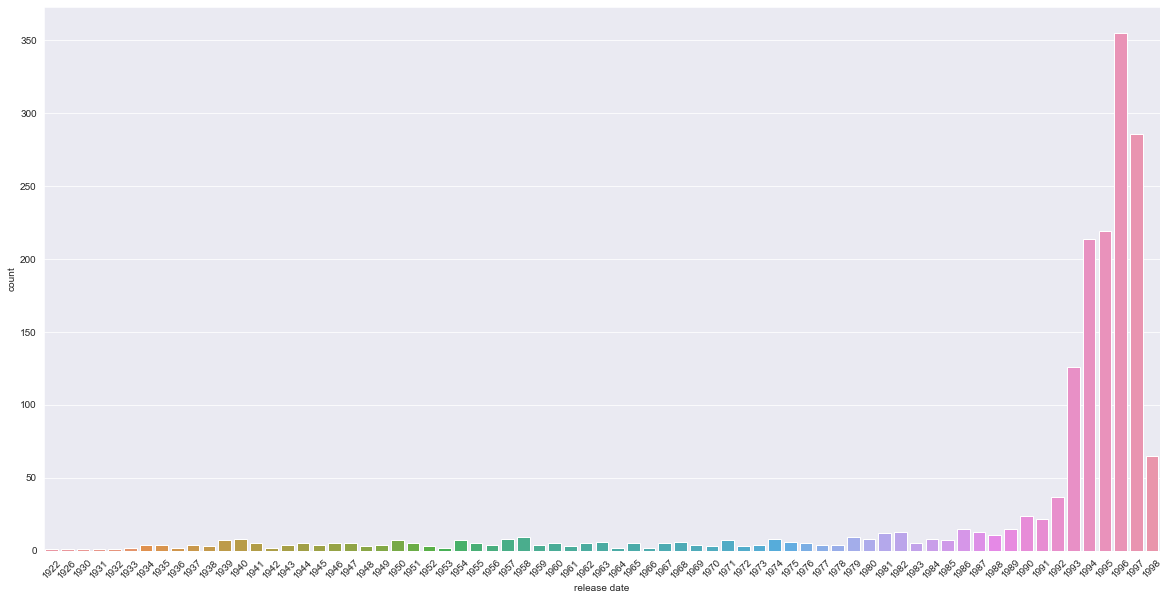

In [262]:
print("\nUnivariate Countplot for 'release year':\n");
movies['release date'] = pd.to_datetime(movies['release date']);
plt.figure(figsize=(20,10));
yearChart=sns.countplot(movies['release date'].dt.year);
yearChart.set_xticklabels(yearChart.get_xticklabels(), rotation=45);
print("\n Insights: Good increase in movies from 1992 onwards but there is a sudden drop in 1998\n")


Univariate Percentage Plot for 'ratings':



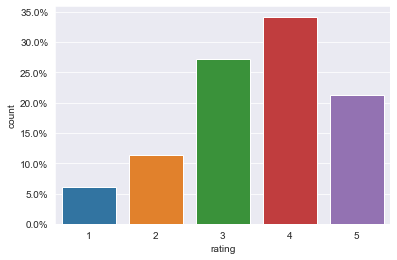

In [54]:
print("\nUnivariate Percentage Plot for 'ratings':\n");
rateChart=sns.countplot(rate['rating']);
rateChart.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(rate)))


Univariate Percentage Plot for 'Gender':



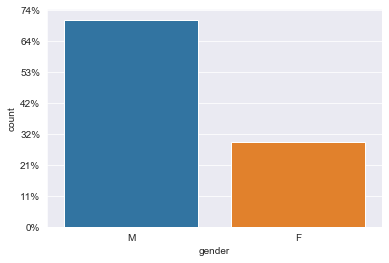

In [55]:
print("\nUnivariate Percentage Plot for 'Gender':\n");
genderChart=sns.countplot(users['gender']);
genderChart.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(users)))


Univariate Percentage Plot for 'Occupation':



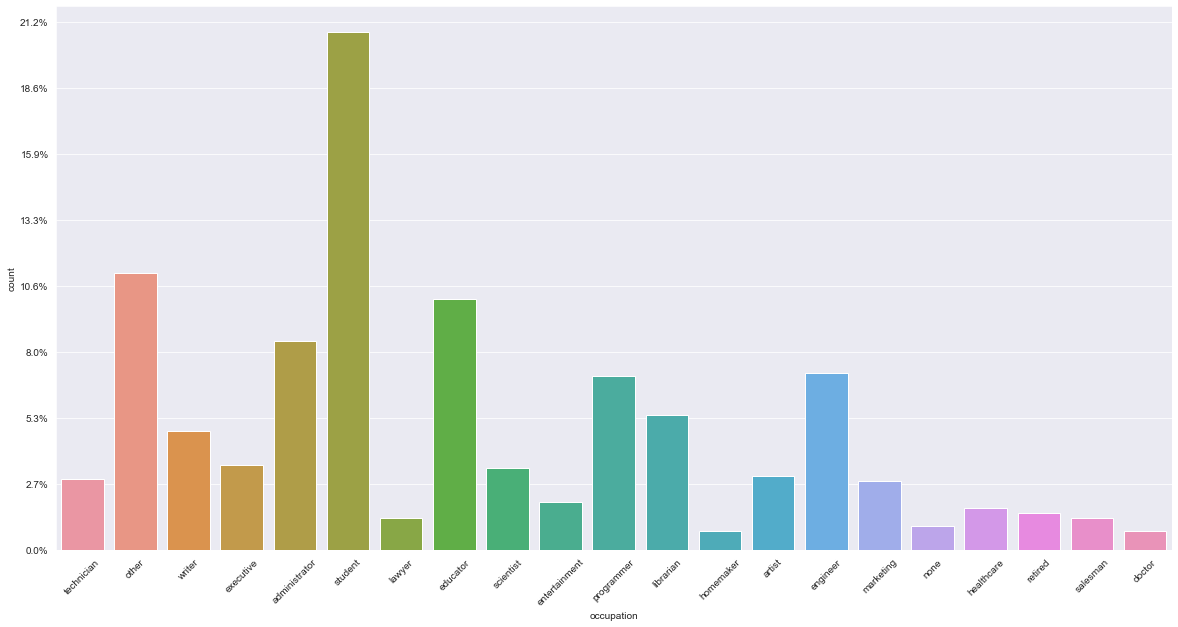

In [58]:
print("\nUnivariate Percentage Plot for 'Occupation':\n");
plt.figure(figsize=(20,10));
occpChart=sns.countplot(users['occupation']);
occpChart.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(users)))
occpChart.set_xticklabels(occpChart.get_xticklabels(), rotation=45);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

Final DataFrame for Year-Genre Table:
               unknown  Action  Adventure  Animation  Childrens  Comedy  \
release year                                                             
1922              0.0     0.0        0.0        0.0        0.0     0.0   
1926              0.0     0.0        0.0        0.0        0.0     0.0   
1930              0.0     0.0        0.0        0.0        0.0     0.0   
1931              0.0     0.0        0.0        0.0        0.0     0.0   
1932              0.0     0.0        0.0        0.0        0.0     0.0   

                  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  \
release year                                                              
1922           0.000000          0.0    0.0      0.0   0.000000   100.0   
1926           0.000000          0.0  100.0      0.0   0.000000     0.0   
1930           0.000000          0.0  100.0      0.0   0.000000     0.0   
1931          33.333333          0.0    0.0      0.0  33.333333    

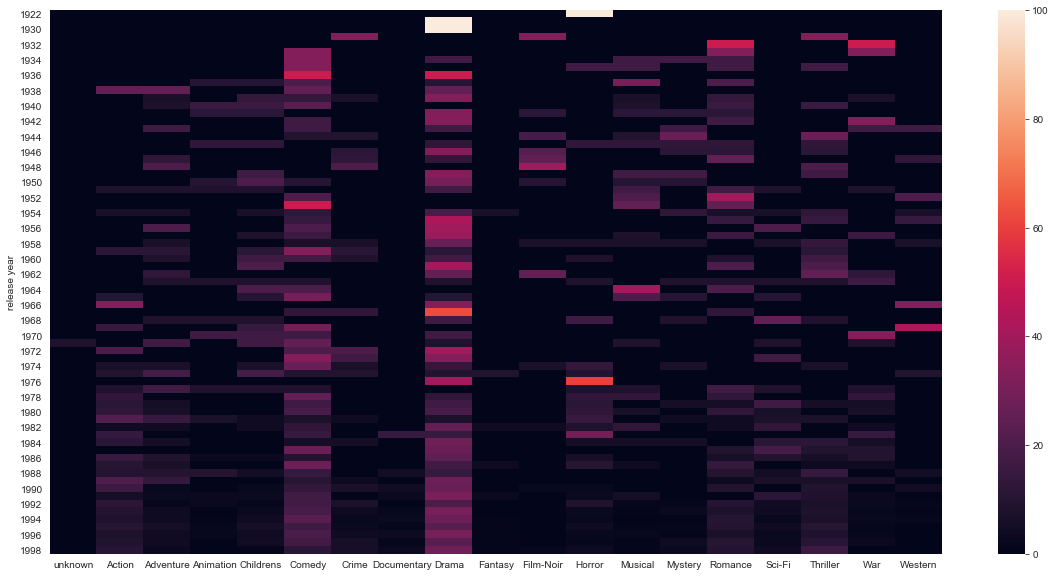

In [115]:
yearAndGenre = movies.iloc[:,2:];
yearAndGenre['release year'] = yearAndGenre['release date'].dt.year;
yearAndGenre.head();
yearAndGenre2=yearAndGenre.groupby(by=['release year']).sum();
yearAndGenre2['total']=yearAndGenre2.sum(axis=1);
yearAndGenre3=yearAndGenre2.div(yearAndGenre2['total'], axis=0)*100;
yearAndGenre3.drop('total',axis=1,inplace=True);
print("Final DataFrame for Year-Genre Table:\n",yearAndGenre3.head());
plt.figure(figsize=(20,10));
sns.heatmap(yearAndGenre3);


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [164]:
moviesAndRatings=pd.merge(movies,rate,how='inner',on='movie id')
moviesAndRatings2=moviesAndRatings.iloc[:,1:2]
moviesAndRatings2['rating']=moviesAndRatings['rating']
moviesAndRatings2
top25Movies=moviesAndRatings2.groupby(by=['movie title']).size().sort_values(ascending=False)[:25];
print("\nTop 25 Highly Rated Movies:\n\n",top25Movies)


movieStats = moviesAndRatings2.groupby(by=['movie title']).agg({'rating': [np.size, np.mean]})
movieStats.iloc[:,0:1]
movieStats2=movieStats.iloc[:,0:0]
movieStats2['ratings_size']=movieStats.iloc[:,0:1]
movieStats2['ratings_mean']=movieStats.iloc[:,1:2]
movieStats2.head()
maxNumRatings=movieStats2['ratings_size'].sort_values(ascending=False)[:25]
maxNumRatings

#movieStats.groupby(by=[('rating', 'size')]).sort_values(ascending=False)[:25]
#movieStats.groupby(by=['rating', 'size'])


Top 25 Highly Rated Movies:

 movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Im

movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Impossible                    344

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.



Gender Preference in Percentage:
          unknown     Action  Adventure  Animation  Childrens     Comedy  \
gender                                                                    
F       0.000000  10.133889   5.849053   1.852852   4.156347  15.023929   
M       0.000629  12.680240   6.679045   1.642698   3.115461  13.697958   

           Crime  Documentary      Drama   Fantasy  Film-Noir    Horror  \
gender                                                                    
F       3.340720     0.348224  20.498687  0.675965   0.716933  2.229009   
M       3.940586     0.359379  18.181074  0.622463   0.848412  2.593070   

         Musical   Mystery    Romance    Sci-Fi   Thriller       War  \
gender                                                                 
F       2.685239  2.446882  10.908549  4.895626   9.470960  4.076274   
M       2.210404  2.474116   8.561538  6.357428  10.564874  4.537244   

         Western  total  
gender                   
F       0.690862  100

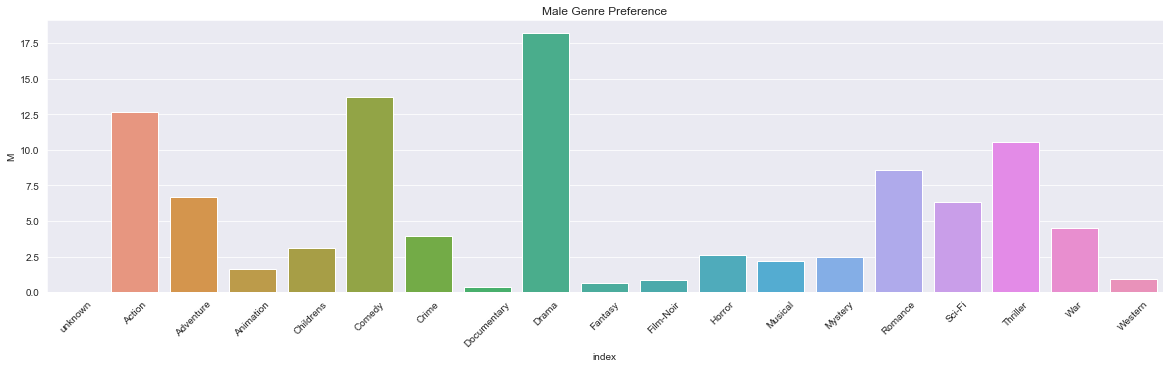

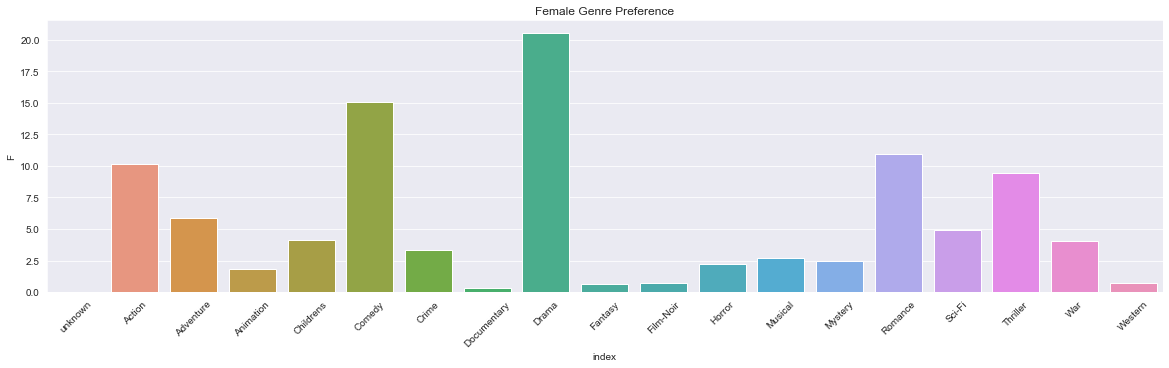



 CONCLUSION: 


Men watch more drama than women: NOT TRUE

Percentage of Drama Watched by Men:  18.181074361959908

Percentage of Drama Watched by Women:  20.498687175285376


Women watch more Sci-Fi than men: NOT TRUE

Percentage of Sci-Fi Watched by Men: 6.357428328665386

Percentage of Sci-Fi Watched by Women: 4.895625779780637


Men watch more Romance than women: NOT TRUE

Percentage of Romance Watched by Men: 8.561538219466911

Percentage of Romance Watched by Women: 10.908549189028136


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
F,0.000000,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.470960,4.076274,0.690862
M,0.000629,12.680240,6.679045,1.642698,3.115461,13.697958,3.940586,0.359379,18.181074,0.622463,0.848412,2.593070,2.210404,2.474116,8.561538,6.357428,10.564874,4.537244,0.933379


In [255]:
dataMerge1=pd.merge(movies,rate,how='inner',on='movie id')
dataMerge1
aggData=pd.merge(dataMerge1,users,how='inner',on='user id')
aggData

genderPref=aggData.groupby(by=['gender']).sum()
#print("\nGender Preference DataFrame:\n",genderPref.head())
genderPref2=genderPref.drop(['movie id', 'user id', 'rating', 'timestamp', 'age'], axis = 1) 
genderPref2['total']=genderPref2.sum(axis=1)
#print("\n\nModified Gender Preference DataFrame:\n",genderPref2.head())
genderPrefPct=genderPref2.div(genderPref2['total'], axis=0)*100;
#print("\n\nGender Preference in Percentage:\n",genderPrefPct)

genderPrefPct.drop('total',axis=1,inplace=True)
genderPrefPct2=(genderPrefPct.T).reset_index()
#genderPrefPct2

plt.figure(figsize=(20,5));
malePrefChart=sns.barplot(genderPrefPct2['index'],genderPrefPct2['M']);
malePrefChart.set_xticklabels(malePrefChart.get_xticklabels(), rotation=45);
malePrefChart.set_title("Male Genre Preference")
plt.show()

plt.figure(figsize=(20,5));
femPrefChart=sns.barplot(genderPrefPct2['index'],genderPrefPct2['F']);
femPrefChart.set_xticklabels(femPrefChart.get_xticklabels(), rotation=45);
femPrefChart.set_title("Female Genre Preference")
plt.show()

genderPrefPct.head()
print("\n\n CONCLUSION: \n")
print("\nMen watch more drama than women: NOT TRUE")
print("\nPercentage of Drama Watched by Men: ",genderPrefPct['Drama'][1])
print("\nPercentage of Drama Watched by Women: ",genderPrefPct['Drama'][0])
print("\n\nWomen watch more Sci-Fi than men: NOT TRUE")
print("\nPercentage of Sci-Fi Watched by Men:",genderPrefPct['Sci-Fi'][1])
print("\nPercentage of Sci-Fi Watched by Women:",genderPrefPct['Sci-Fi'][0])
print("\n\nMen watch more Romance than women: NOT TRUE")
print("\nPercentage of Romance Watched by Men:",genderPrefPct['Romance'][1])
print("\nPercentage of Romance Watched by Women:",genderPrefPct['Romance'][0])
genderPrefPct.head()